# 1. Importing

In [3]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt

from ultragrad import Tensor
from ultragrad.nn import Sequential,Linear,Tanh,ReLU
from ultragrad.losses import MSELoss
from ultragrad.optim import SGD

# 2. Creating the Dataset

In [4]:
# creating a dataset
np.random.seed(42)

X = np.linspace(-np.pi,np.pi,200).reshape(-1,1)
y = np.sin(X) + np.random.normal(0,0.15,X.shape)

X_train = Tensor(X)
y_train = Tensor(y)

# 3. Model Creation and Training

In [5]:
# model creation
in_features = 1
out_features = 1
hidden_dim = 32

model = Sequential(
    Linear(in_features,hidden_dim),
    ReLU(),
    Linear(hidden_dim,out_features)
)

In [6]:
# training 
learning_rate = 0.01
epoches = 1000

loss_fn = MSELoss()
optimizer = SGD(model.parameters(),learning_rate)

loss_hist= []

for epoch in range(epoches):
    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)

    # 3. Zero Grad
    model.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Update the params
    optimizer.step()

    loss_hist.append(loss.data.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch : ({epoch+1} / {epoches}) Loss : {loss.data.item():.5f}")

Epoch : (100 / 1000) Loss : 0.17726
Epoch : (200 / 1000) Loss : 0.14544
Epoch : (300 / 1000) Loss : 0.12609
Epoch : (400 / 1000) Loss : 0.11418
Epoch : (500 / 1000) Loss : 0.10666
Epoch : (600 / 1000) Loss : 0.10166
Epoch : (700 / 1000) Loss : 0.09832
Epoch : (800 / 1000) Loss : 0.09591
Epoch : (900 / 1000) Loss : 0.09394
Epoch : (1000 / 1000) Loss : 0.09219


In [13]:
# prediction
final_preds = model(X_train)

# 4. Plotting the model performance

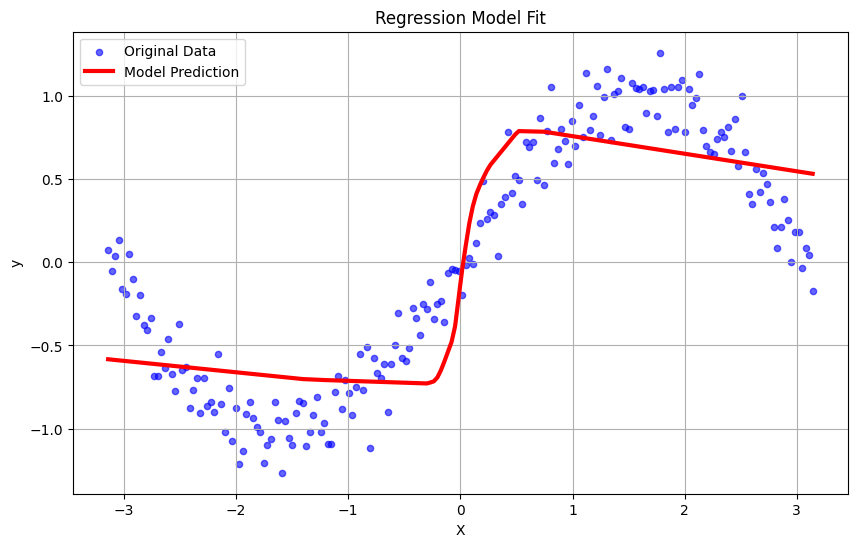

In [ ]:
# model fitting the data curve
plt.figure(figsize=(10, 6))
plt.scatter(X_train.data, y_train.data, label='Original Data', color='blue', alpha=0.6, s=20)
plt.plot(X_train.data, final_preds.data, label='Model Prediction', color='red', linewidth=3)
plt.title('Regression Model Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

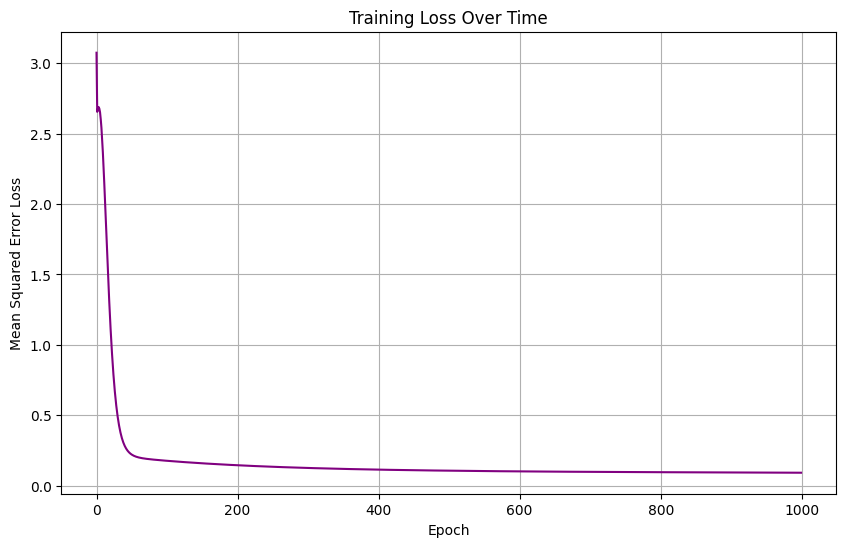

In [9]:
# loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(epoches), loss_hist, color='purple')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.grid(True)
plt.show()

# 5. Save and load the model

In [11]:
# save the model
from ultragrad.nn import save

save_path = "SAVE_PATH.safetensors"
save(model,save_path)

Model state saved to SAVE_PATH.safetensors using safetensors.


In [12]:
# load the model
from ultragrad.nn import load

load_path = "SAVE_PATH.safetensors"

new_model = Sequential(
    Linear(in_features,hidden_dim),
    ReLU(),
    Linear(hidden_dim,out_features)
)

load(new_model,load_path)

State dict successfully loaded into the model.
